## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.group.unique()

array(['control', 'treatment'], dtype=object)

In [7]:
df.query('(landing_page == "new_page" and group == "control") or (landing_page == "old_page" and group == "treatment")').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

> No missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.query('(landing_page == "new_page" and group == "treatment") or (landing_page == "old_page" and group == "control")')

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

2893

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [12]:
df2 = df2.drop([0,2893])

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [13]:
df2.converted.mean()

0.11959749882133504

b. Given that an individual was in the `control` group, what is the probability they converted?

In [14]:
df2.query('group == "control"')['converted'].mean()

0.12038713319061353

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [15]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [16]:
df2.query('landing_page == "new_page"')['user_id'].mean()

787845.71928979422

In [17]:
df2['timestamp'] = pd.to_datetime(df2.timestamp)

In [18]:
df2['date'] = df2.timestamp.dt.date

In [19]:
df2.head()

,user_id,timestamp,group,landing_page,converted,date
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,2017-01-10


In [20]:
date_diff = df2.query('group == "treatment"')['date'].max() - df2.query('group == "treatment"')['date'].min()

date_diff

datetime.timedelta(22)

In [21]:
date_diff = df2.query('group == "control"')['date'].max() - df2.query('group == "control"')['date'].min()

date_diff

datetime.timedelta(22)

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

>At this time, **I do not believe** the treatment page lead to more converisons for the following reasons:

>- The Treatment group's average conversion rate is less than that of the control group
>- Users had an even posibility to land in either group (control vs treatment)
>- The test were both ran for 20 days supporting that all things remained constant other than the the group themselves. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The Null Hypothesis is **$p_{new}$** - **$p_{old}$**  <= 0

The Alternative Hypothesis is **$p_{new}$** - **$p_{old}$**  > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
Pnew = df2['converted'].mean()

Pnew

0.11959749882133504

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
Pold = df2['converted'].mean()
Pold

0.11959749882133504

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
n_new = df2.query('group == "treatment"')['user_id'].nunique()

n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old = df2.query('group == "control"')['user_id'].nunique()

n_old

145273

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.binomial(1, Pnew,n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(1, Pold, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
ob_diff = (df2.query('group == "treatment"')["converted"].sum()/df2.query('group == "treatment"')['user_id']\
.count()) - (df2.query('group== "control"')["converted"].sum()/df2.query('group == "control"')['user_id'].count())

ob_diff

-0.0015790676755078892

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
p_diffs = []

for _ in range(10000):
    #gather conversion rates
    Pold = df2['converted'].mean()
    Pnew = df2['converted'].mean()
    
    #gather n the number in each group
    n_old = df2.query('group == "control"')['user_id'].nunique()
    n_new = df2.query('group == "treatment"')['user_id'].nunique()
    
    #simulate new_converted rates using the Prob of Old and New
    old_page_converted = np.random.binomial(1, Pold, n_old)
    new_page_converted = np.random.binomial(1, Pnew, n_new)
    #append old - new in diffs
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

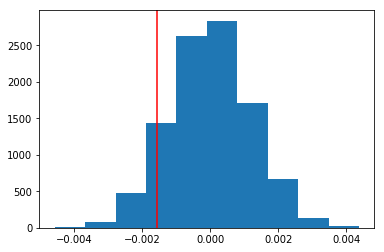

In [30]:
p_diffs = np.array(p_diffs)


plt.hist(p_diffs);
plt.axvline(ob_diff, color = 'r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
p = (p_diffs > ob_diff).mean()

p

0.90959999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>By taking the difference in probability between our controlled and treatment groups and comparing the proportion that is greater than the observed differences we are calculating the **P-value**. This measure is used to determine the probability that our null hypothesis is true (or one more extreme if the alternative is true).  

>In A/B Testing a small P-Value tells us that the probability of the null being true is small and vice versa. EX if your P-value is <= 0.05, then there is only a 5% probability that we should accept the null.  

>We have a P-value of bigger than **0.05** which is favorable towards **Failing to reject the Null Hypothesis** or that the old_page is still more favorable.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1')["user_id"].nunique()
convert_new = df2.query('landing_page == "new_page" and converted == 1')["user_id"].nunique()
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

convert_old

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score, pval = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old])\
                                          , alternative = "larger")

display(z_score, pval)

-1.3116083211881657

0.90517383802520912

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>The Z- score lets us know that the conversion rates of old and new pages are **1.3** standard devations below the mean.  

>Our P- value is greater than 0.05 which lets us know that the probability of **failing to reject the null** is more favorable. This agrees with parts J and K that the **Old page conversion** is more favorable than the new page . 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression should be performed since we are expecting binary results. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df2[['ab_page',"old_page"]] = pd.get_dummies(df2['landing_page'])

In [35]:
df2['intercept'] = 1



c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
log_m = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = log_m.fit()

Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-02 02:25 AIC:              212780.0937
No. Observations:   290583           BIC:              212801.2529
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6679  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

>The P- Value is **0.1897** which tells us that the probability of observing the null statistic is **18.9%** . The reason we have a different P - value compared to part II is because part II is running a **One - Tailed T-Test** compared to the **Two - Tailed T - Test** in our stats model. [UCLA One Tail vs Two Tail](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/) is a good reference point for the difference between the two types of T - test. In summary, a one tailed test is only looking at P-values that are significantly greater or less than the mean but not both. A two tailed t test looks at both extremes from the mean and splits the confidence interval by two. 


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>ab_page alone does not give us enough statically sigfigance to reject the null hypothesis. Exploring different factors can show us that maybe other factors aside from the ab_page is significant in rejecting or failing to reject the null hypothesis. It's important to note that the more factors that are added to your model the more we would need to make sure the variables are independent of each other and does not contain high multicollinearity 


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
df3 = pd.read_csv('countries.csv')

df3.head()

df2 = df2.set_index('user_id').join(df3.set_index('user_id'), how = "left") 

df2.head()

,timestamp,group,landing_page,converted,date,ab_page,old_page,intercept,country
user_id,,,,,,,,,
804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12,0,1,1,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11,1,0,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08,1,0,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21,0,1,1,US
936923,2017-01-10 15:20:49.083499,control,old_page,0,2017-01-10,0,1,1,US


In [39]:
df2[["CA", "UK", "US"]]=pd.get_dummies(df2.country)

In [40]:
log_m = sm.Logit(df2["converted"],df2[["intercept","ab_page","CA","UK"]])
result = log_m.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-02 02:25 AIC:              212780.8689
No. Observations:   290583           BIC:              212823.1875
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7615  0.0000  -2.0067  -1.9718
ab_page      -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5163  0.1294  -0.0935   0.0119
UK            0.0099    0.0133     0.7429  0.4575  -0.0162   0.0359
==================================================================

"""

> The p-values for countries are still above the 0.05 threshold telling us it does not have a signfigant factor on conversion and we should still **fail to reject the null**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
df2["CA_ab_page"] = df2["CA"]*df2["ab_page"]

df2["UK_ab_page"] = df2["UK"]*df2["ab_page"]

log_m = sm.Logit(df2["converted"],df2[["intercept","ab_page", "CA","UK","CA_ab_page","UK_ab_page"]])
result = log_m.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-02 02:25 AIC:              212782.4031
No. Observations:   290583           BIC:              212845.8810
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290577           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3427  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5060  0.1321  -0.0474   0.0062
CA           -0.0175    0.0377    -0.4654  0.6416  -0.0914   0.0563
UK           -0.0058    0.0188    -0.3063  0.7594  -0.0426   0.0311
CA_ab_page   -0.0469    0.0538    -0.8716  0.3834  -0.1523   0.0585
UK_ab_page    0.0314    0.0266     1.1811  0.2375  -0.0207   0.0835
==================================================================

"""

> Even after adding interaction terms,  we still do not have a P - value lower than 0.05. Thus we fail to reject the null hypothesis and the company should stick with the **old page**